In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from urllib import request
#from google.colab import drive
!pip install phoenix_ml9
from phoenix_ml9 import Framework
#drive.mount('/content/gdrive')
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
#download model_parmters.py
gdd.download_file_from_google_drive(file_id='1_IgmjA3l33goCvE-xTEu4caRBdB7jwNf',
                                    dest_path='./model_parameters.py',
                                    unzip=False)

#download  parameters.py
# 1-FPWvaRu1hVkQlTJOl5gWZa5nATNgi8F
gdd.download_file_from_google_drive(file_id='1-FPWvaRu1hVkQlTJOl5gWZa5nATNgi8F',
                                    dest_path='./parameters.py',
                                    unzip=False)

In [ ]:
def init():
    Framework.download_mnist()
    Framework.save_mnist()
def get_batch(X, Y, batch_size):
    N = len(X)
    i = random.randint(1, N-batch_size)
    return X[i:i+batch_size], Y[i:i+batch_size]
init()
X_train, Y_train, X_test, Y_test = Framework.load()
Y_evalution = Y_test



batch_size = 1000
D_out=10

X_batch, Y_batch = get_batch(X_train, Y_train, batch_size)
Y_train = Framework.MakeOneHot(Y_train, D_out)
Y_batch = Framework.MakeOneHot(Y_batch, D_out)
Y_test  = Framework.MakeOneHot(Y_test, D_out)

#testing 1 example

X_test_example, Y_test_example = get_batch(X_train, Y_train, 1)




Download complete.
Save complete.


Cost after iteration 0: 0.262038
Cost after iteration 1: 0.261913
Cost after iteration 2: 0.261790
Cost after iteration 3: 0.261669
Cost after iteration 4: 0.261549
Cost after iteration 5: 0.261431
Cost after iteration 6: 0.261314
Cost after iteration 7: 0.261199
Cost after iteration 8: 0.261085
Cost after iteration 9: 0.260972


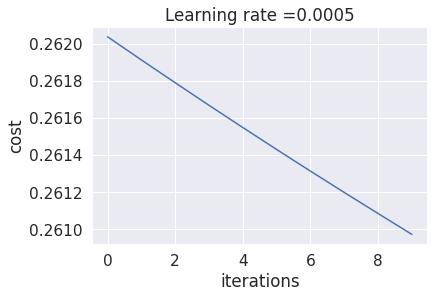

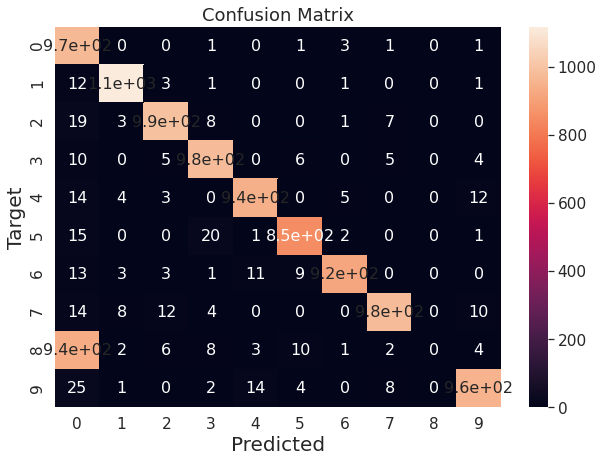

[[ 973    0    0    1    0    1    3    1    0    1]
 [  12 1117    3    1    0    0    1    0    0    1]
 [  19    3  994    8    0    0    1    7    0    0]
 [  10    0    5  980    0    6    0    5    0    4]
 [  14    4    3    0  944    0    5    0    0   12]
 [  15    0    0   20    1  853    2    0    0    1]
 [  13    3    3    1   11    9  918    0    0    0]
 [  14    8   12    4    0    0    0  980    0   10]
 [ 938    2    6    8    3   10    1    2    0    4]
 [  25    1    0    2   14    4    0    8    0  955]]
+--------------+--------------+-------------------------------------------------------+--------------+----------------+----------------+----------------+----------------+
|      FP      |      FN      |                           TP                          |      TN      |    Accuracy    |   Precision    |     Recall     |    F1 score    |
+--------------+--------------+-------------------------------------------------------+--------------+----------------+--------

In [ ]:
# 'parameters.py'-> the last weights and is used in "prev_parameters" intilization case

layers_dims = [784,256,256,128,32,10]
X_train_t = np.transpose(X_train)
X_test_t = np.transpose(X_test)
X_batch_t = np.transpose(X_batch)
Y_test_t = np.transpose(Y_test)
Y_batch_t = np.transpose(Y_batch)
Y_train_t = np.transpose(Y_train)
X = X_train_t
Y = Y_train_t
# optimizer = "gd" , "adam" , "SGD" , "mini_batch" , "momentum"
optimizer = "gd"
# optimizer_mini_batch = "gd" , "adam" , "momentum"
optimizer_mini_batch = "adam"
# initialization = "random" , "zeros" ,"prev_parameters" -> initilaize with known values from parameters.npy file
initialization = "prev_parameters"
# ActivationFunctions = "relu" , "identity" , "sigmoid" , "tanh"
A_layers = "relu"
A_out = "relu"
num_iterations = 10
learning_rate = 0.0005
print_cost = True
epsilon = 1e-8
mini_batch_size = 1000
beta1 = 0.9
beta2 = 0.999
beta = 0.9
print_every=1
# if prev_parameters not used make it else = utils_module.load()
if initialization=="prev_parameters":
    prev_parameters = Framework.load_parameters('parameters.py')
save = True
save_to_model = True

#if previous weights reaches good accuracy save it to model_parameters.py before saving the current weights to parameters.py
if save_to_model:
    model_parameters = Framework.load_parameters('parameters.py')
    Framework.save_parameters('parameters.py', model_parameters)

if optimizer == "gd":
    parameters = Framework.L_layer_model_GD(X, Y, layers_dims, initialization, A_layers, A_out,prev_parameters, learning_rate, num_iterations,
                     print_cost,print_every)
elif optimizer == "SGD":
    parameters = Framework.L_layer_model_SGD(X, Y, layers_dims, initialization, A_layers, A_out,prev_parameters, learning_rate, num_iterations, print_cost,print_every)
elif optimizer == "momentum":
    parameters = Framework.L_layer_model_GDWithMomentum(X, Y, layers_dims, initialization, A_layers, A_out,prev_parameters, beta, learning_rate, num_iterations, print_cost,print_every)

elif optimizer == "adam":
    parameters = Framework.L_layer_model_Adam(X, Y, layers_dims,initialization, A_layers , A_out ,prev_parameters,beta1 , beta2 ,  epsilon ,learning_rate,
                                                 num_iterations,  print_cost,print_every)

elif optimizer == "mini_batch":
    parameters = Framework.L_layer_model_minibatch(X, Y, layers_dims, optimizer_mini_batch, initialization, A_layers, A_out,prev_parameters,
                                                      mini_batch_size, learning_rate, beta,
                            beta1, beta2, epsilon, num_iterations, print_cost,print_every)


if save:
    Framework.save_parameters('parameters.py',parameters)


Y_pred , cache = Framework.L_model_forward(X_test_t,parameters,A_layers,A_out)
Loss = Framework.compute_cost(Y_pred,Y_test_t)
Y_evalution_pred = np.argmax(Y_pred,axis=0)
Framework.confusionmatrix(Y_evalution, Y_evalution_pred)

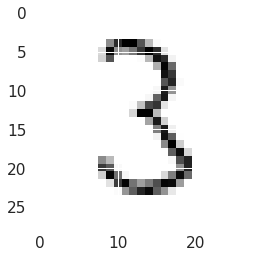

The Number is:[3]


In [ ]:
#"model_parameters.py" -> has model parameters which achieved the least loss 
img = X_test_example.reshape((28, 28))
plt.imshow(img, cmap="Greys")
plt.show()


# ActivationFunctions = "relu" , "identity" , "sigmoid" , "tanh"
A_layers = "relu"
A_out = "relu"
parameters = Framework.load_parameters('model_parameters.py')
input = np.transpose(X_test_example)
Y_pred , cache = Framework.L_model_forward(input,parameters,A_layers,A_out)
classification = np.argmax(Y_pred,axis=0)

print("The Number is:" + str(classification))

## **Extra features: 1) Data Preprocessing module for Advanced Regression Techniques**

In [ ]:
#download train dataset for House Prices: Advanced Regression Techniques
gdd.download_file_from_google_drive(file_id='1lg6n60aWq-BLx1yETFREvbGkFbWnSbIf',
                                    dest_path='./train.csv',
                                    unzip=False)


In [ ]:
df = pd.read_csv("train.csv",low_memory=False)

In [ ]:
#display all dataset 
Framework.display_all(df.head(20))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
X = df.drop(["SalePrice"],axis = 1)
y=df["SalePrice"]

In [ ]:
#process missing nan values
X, missing_val = Framework.process_missing(X)

In [ ]:
#missing values and the corresponiding replacing median value
missing_val

{'GarageYrBlt': 1980.0, 'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [ ]:
#process text data one hot encoding to classes
X, cat_dict = Framework.process_cat(X,max_cardi=5) #max number of classes is 5

In [ ]:
#dictionary of categories 
cat_dict

{'Alley': Index(['Grvl', 'Pave'], dtype='object'),
 'BldgType': Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype='object'),
 'BsmtCond': Index(['Fa', 'Gd', 'Po', 'TA'], dtype='object'),
 'BsmtExposure': Index(['Av', 'Gd', 'Mn', 'No'], dtype='object'),
 'BsmtFinType1': Index(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype='object'),
 'BsmtFinType2': Index(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype='object'),
 'BsmtQual': Index(['Ex', 'Fa', 'Gd', 'TA'], dtype='object'),
 'CentralAir': Index(['N', 'Y'], dtype='object'),
 'Condition1': Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'],
       dtype='object'),
 'Condition2': Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'], dtype='object'),
 'Electrical': Index(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype='object'),
 'ExterCond': Index(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype='object'),
 'ExterQual': Index(['Ex', 'Fa', 'Gd', 'TA'], dtype='object'),
 'Ex




# **Extra features 2) cnn**

In [ ]:
#cnn testing
w1=np.array([[1, 1,1],[0, 0,0], [-1,-1,-1]])
w1=np.reshape(w1,(3,3,1,1))
x =np.array([[10,10,10,0,0,0],[10,10,10,0,0,0],[10,10,10,0,0,0],[0,0,0,10,10,10],[0,0,0,10,10,10],[0,0,0,10,10,10]])
x=np.reshape(x,(1,6,6,1))
#print(x)
b=np.array([[0]])
b=np.reshape(b,(1,1,1,1))
A=  Framework.conv(x, w1, b,1,0)
print(A)

A=Framework.pool(A, 2,2,"max")
print(A)


[[[[  0.]
   [  0.]
   [  0.]
   [  0.]]

  [[ 30.]
   [ 10.]
   [-10.]
   [-30.]]

  [[ 30.]
   [ 10.]
   [-10.]
   [-30.]]

  [[  0.]
   [  0.]
   [  0.]
   [  0.]]]]
[[[[30.]
   [ 0.]]

  [[30.]
   [ 0.]]]]
